# DataX: Urban water consumption in China

### A. Team

Andrew, Brandon, Charles, Djavi, Rinitha

### B. Overview and research problem: 

China's cities consume enormous amounts of water each year. Our research applies exploratory data analysis and machine learning to shed light on the water consumption trends in this vast country. 

Notes about this data:

1. This primary data was compiled from Urban Water Usage Statistical Yearbooks in China and other sources. The current data encompasses the years 2011 to 2013. 

2. The raw data was acquired from Assistant Professor Xin DONG of Tsinghua University. 

3. The original dataset was disjointed and dirty, spread across numerous excel spreadsheets. Steps to clean and pre-process the data included: 
 - Extensive use of VLOOKUP functions to aggregate a decade of data into one complete dataframe.
 - Extensive use of Excel's data cleaning functions such as TRIM, CLEAN, CONCATENATE, and numerous logical operators. 
 - Removal of outliers in each feature (values with standard deviations of +/- 3 were removed from the data) 

Several versions of the cleaned dataset are available to load into this notebook: 
(A) Outliers_Removed.xlsx
(B) Clean_Data_Final.xlsx

### C. Contents

This notebook consists of the following sections: 
1. Initialization (additional data pre-processing) 
2. Visual exploratory data analysis (objective: understand structure and relationships in the data) 
3. Classification (Cluster data to identify similarities between groups)
4. Prediction (Predict feature values based on a range of machine learning tools) 

### D. Which are the features of particular interest for our project? (team discussion)

Some thoughts below.

If our y-value was...
    
City: Could we predict which city an observation was?
Province: Could we predict which province an observation was in?


Policymakers may be interested in knowing what combination of features allows us to predict the following y's: 

- 2.2. Average supply per day (10,000 cubic metres/day)
- 2.3. Maximum supplied in a day (10,000 cubic metres/day)
- 5.1. Coverage rate of urban water supply (%) 
- 6.1. Average water use for all purposes (L/person*day)
- 9.1 Loss and leakage volume (10,000 cubic metres)
- 14.1. Overall rate of water that meets standard (%)
- 23.1 Unit water sales cost (yuan / thousand m3)

average water supplied by a city? (Several prediction algorithms to use here including multiple linear regression etc.)





# 1. Initialization

Goals:
Load data; drop rows and columns with excessive NaN values; 

### 1.A. Load data, pre-processing, imputation of missing values

In [2]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in data with outliers removed. 
df = pd.read_excel('Outliers_Removed.xlsx')

In [4]:
# What is the shape of the loaded data? 
df.shape

(7524, 88)

In [5]:
#Drop rows and columns with too many NaNs
df = df.dropna(thresh=5000, axis='columns') #Drop columns that have at least 3000 non-NaN values
df = df.dropna(how='any', thresh=40) # Rows/observations should have at least 30 non-NaN values 

#Shape of the refined data
df.shape

(5525, 50)

In [6]:
#Check: how many remaining null values are there for each feature?
df.isnull().sum()

#Show the features with null values as a percent of the total values
df.isnull().sum()/len(df)

# Table below shows acceptable values for missing data (feature with highest missing data is ~14%)
# Imputing NaN values with the mean average of each column is more reliable with less missing data. 

City/province name (CN)                                                             0.000000
City/province name (EN)                                                             0.000000
Province                                                                            0.000000
Year                                                                                0.000000
1.1. Total production capacity (10,000 cubic metres/day)                            0.006154
1.3. Number of plants (units)                                                       0.024434
2.1. Total water supply volume / year (10,000 cubic metres/year)                    0.005973
2.2. Average supply per day (10,000 cubic metres/day)                               0.009412
2.3. Maximum supplied in a day (10,000 cubic metres/day)                            0.024796
3.1. Total Volume of water sold (10,000 cubic metres/year)                          0.008869
3.2. Of which Domestic/residential water (10,000 cubic metres/year)   

In [7]:
# Create a dataframe with the NaN values filled in with the mean of column features
df_og = df.fillna(df.mean())    

# 2. Visual exploratory data analysis

Goals: Understand relationships in the data

### 2.A. Pairplots
Scatter plots showing the relationship between selected features

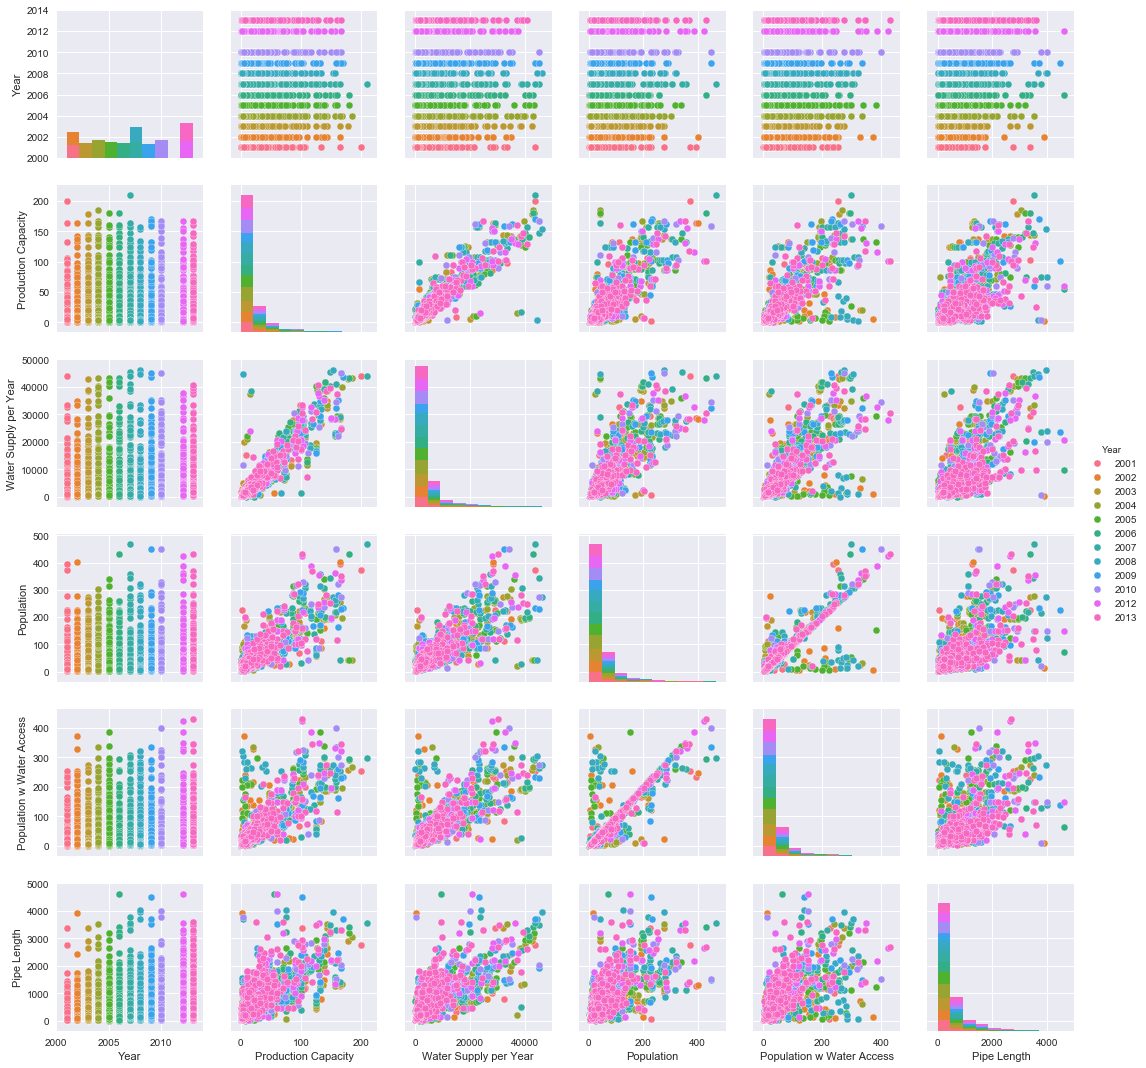

In [12]:
# Pairplots show the relationship between selected features (change selected features as required)

# Chosen features for this pairplot: 
combo = ['Year',
         '1.1. Total production capacity (10,000 cubic metres/day)',
         '2.1. Total water supply volume / year (10,000 cubic metres/year)',
         '5.2. Total city population (10,000s)',
         '5.3. Total city population with water access (10,000s)',
         '8.1. Total pipe length (km)',]

df=df_og[combo].copy()
df.dropna(axis=0,how='any',inplace=True) #redundant now since means have been imputed, but keep in case other data is loaded
df.reset_index(drop=True,inplace=True)
df.columns=['Year','Production Capacity','Water Supply per Year','Population','Population w Water Access','Pipe Length']
df

sns.pairplot(data=df,hue='Year', kind='scatter',diag_kind='hist')
plt.show()

### 2.B. Boxplots, Swarmplots 

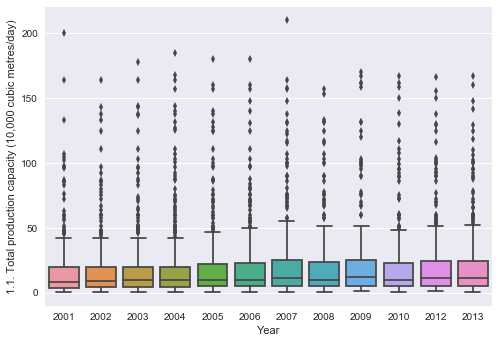

In [13]:
#Shitty boxplot
sns.boxplot(x='Year', y='1.1. Total production capacity (10,000 cubic metres/day)', data= df_og,)
plt.show()

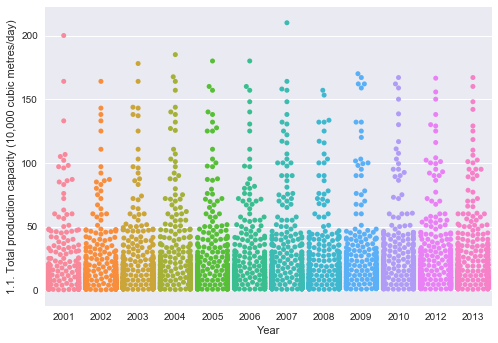

In [14]:
#Shitty swarmplot
sns.swarmplot(x='Year', y='1.1. Total production capacity (10,000 cubic metres/day)', data= df_og)
plt.show()

### 2.C. Heatmap

In [15]:
sns.set(style="white")

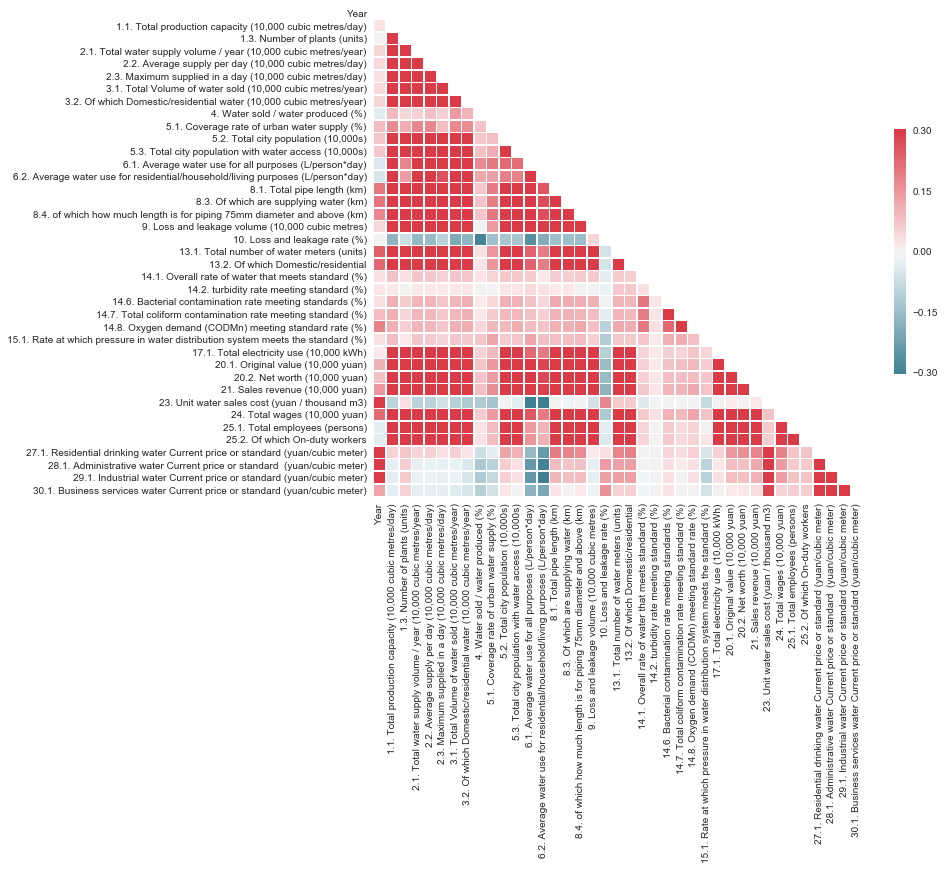

In [16]:
# Compute the correlation matrix of the entire loaded data
corr = df_og.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

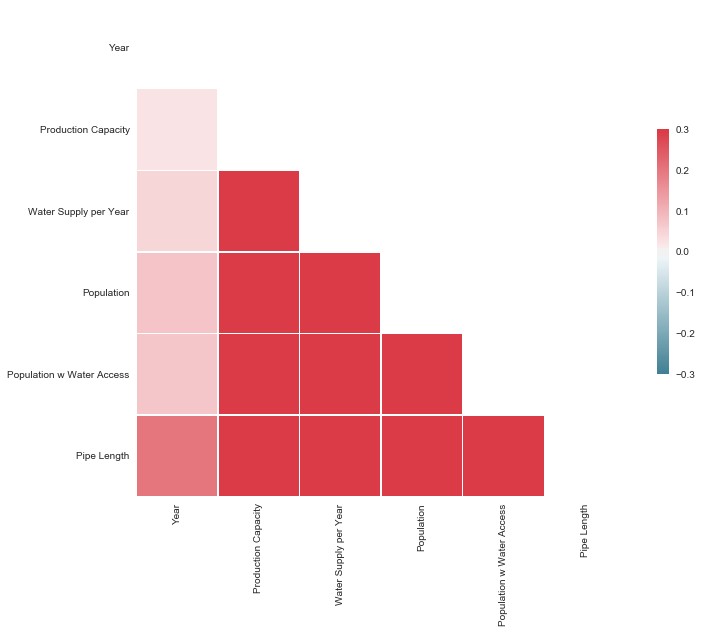

In [17]:
# Compute the correlation matrix of a subset of the data with the features chosen before in section 2.A.
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### 2.D. Linear Regression

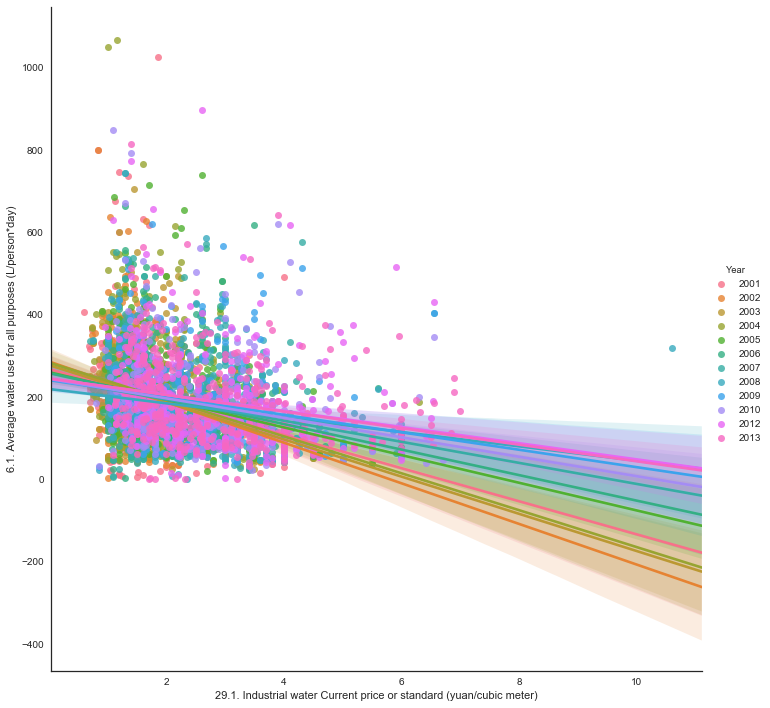

In [18]:
#Higher water price --> less water used
x = '29.1. Industrial water Current price or standard (yuan/cubic meter)'
y = '6.1. Average water use for all purposes (L/person*day)'
sns.lmplot(x,y, data=df_og, hue = 'Year', size = 10)
plt.show()

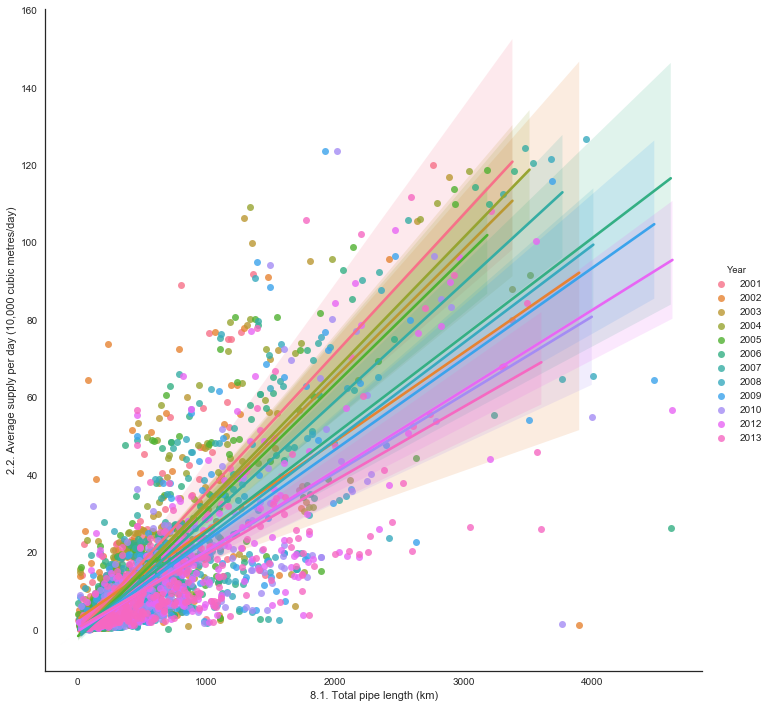

In [19]:
#Longer pipes --> Higher water supply per day
x = '8.1. Total pipe length (km)'
y = '2.2. Average supply per day (10,000 cubic metres/day)'
sns.lmplot(x,y, data=df_og, hue = 'Year', truncate=True, size=10)
plt.show()

In [9]:
df_og.columns

Index(['City/province name (CN)', 'City/province name (EN)', 'Province',
       'Year', '1.1. Total production capacity (10,000 cubic metres/day)',
       '1.3. Number of plants (units)',
       '2.1. Total water supply volume / year (10,000 cubic metres/year)',
       '2.2. Average supply per day (10,000 cubic metres/day)',
       '2.3. Maximum supplied in a day (10,000 cubic metres/day)',
       '3.1. Total Volume of water sold (10,000 cubic metres/year)',
       '3.2. Of which Domestic/residential water (10,000 cubic metres/year)',
       '3.4. Of which Industrial (10,000 cubic metres/year)',
       '3.5. Of which Commercial (10,000 cubic metres/year)',
       '4. Water sold / water produced (%)',
       '5.1. Coverage rate of urban water supply (%)',
       '5.2. Total city population (10,000s)',
       '5.3. Total city population with water access (10,000s)',
       '6.1. Average water use for all purposes (L/person*day)',
       '6.2. Average water use for residential/household/l

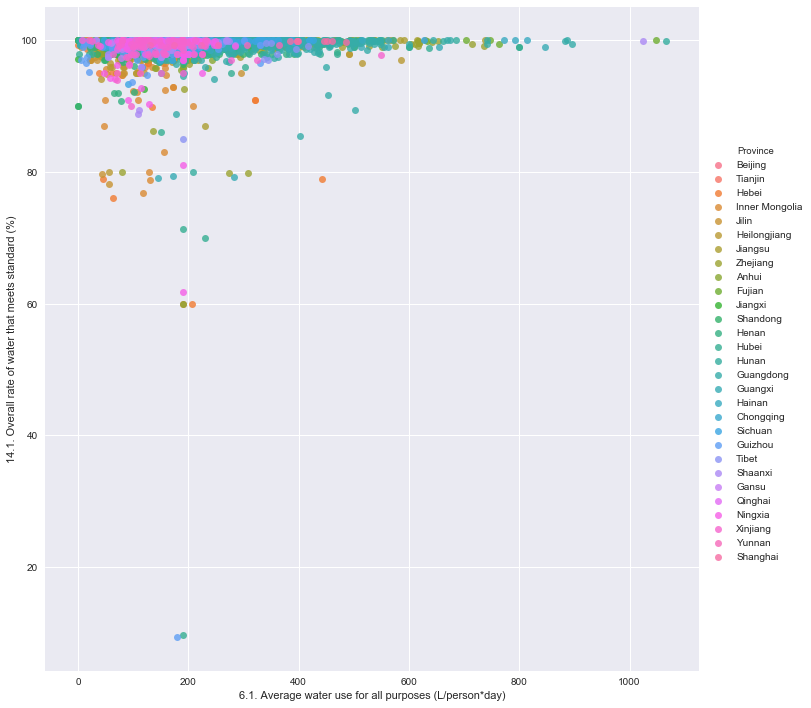

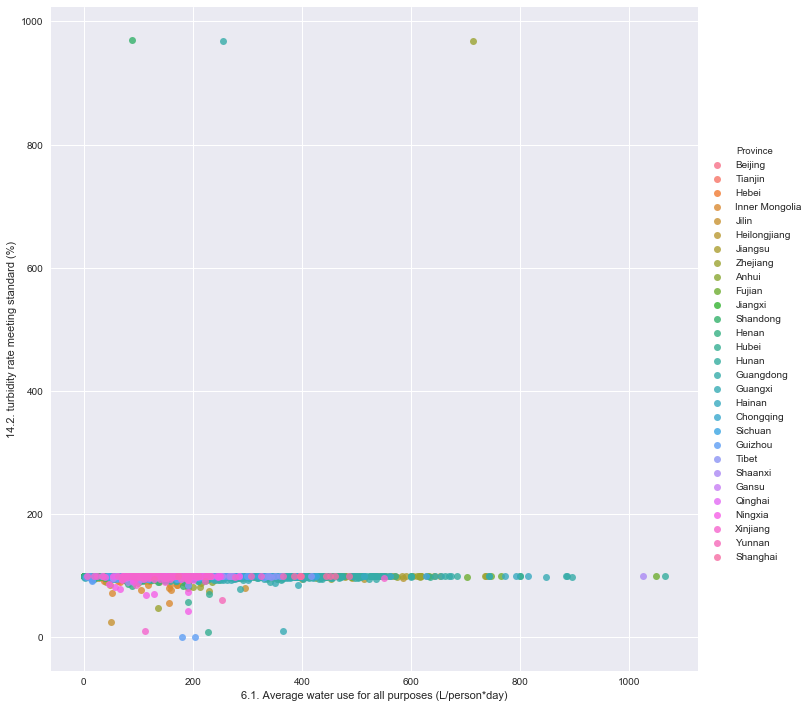

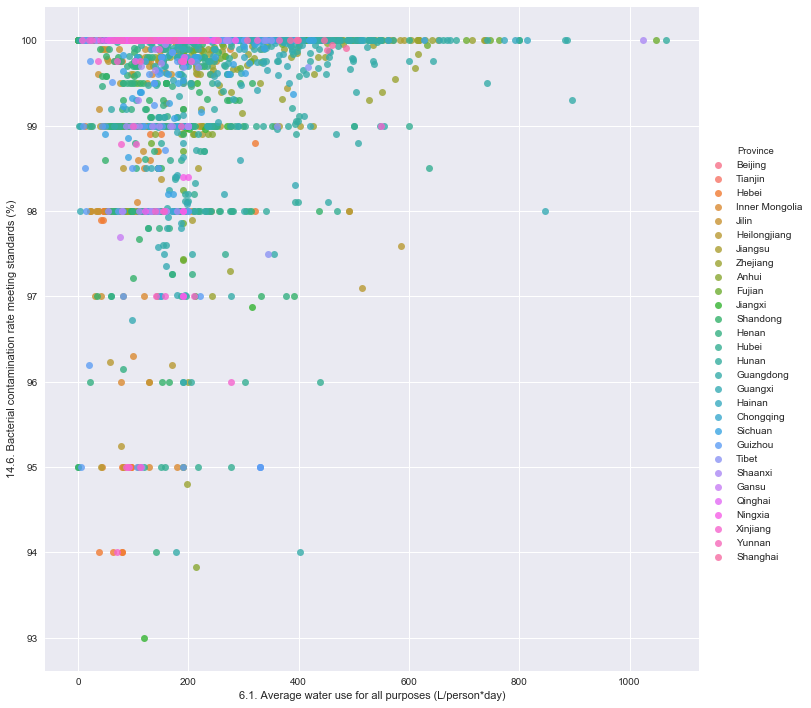

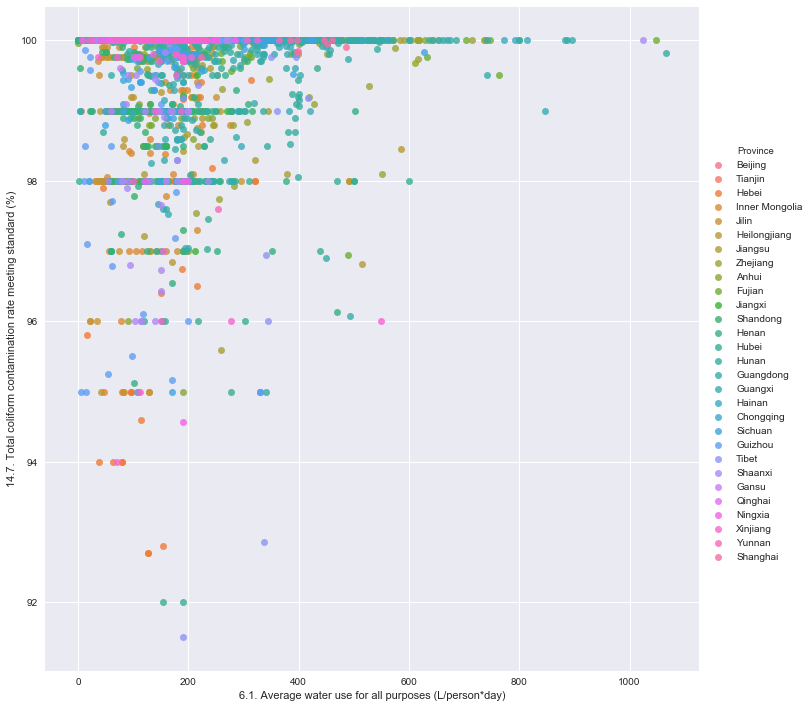

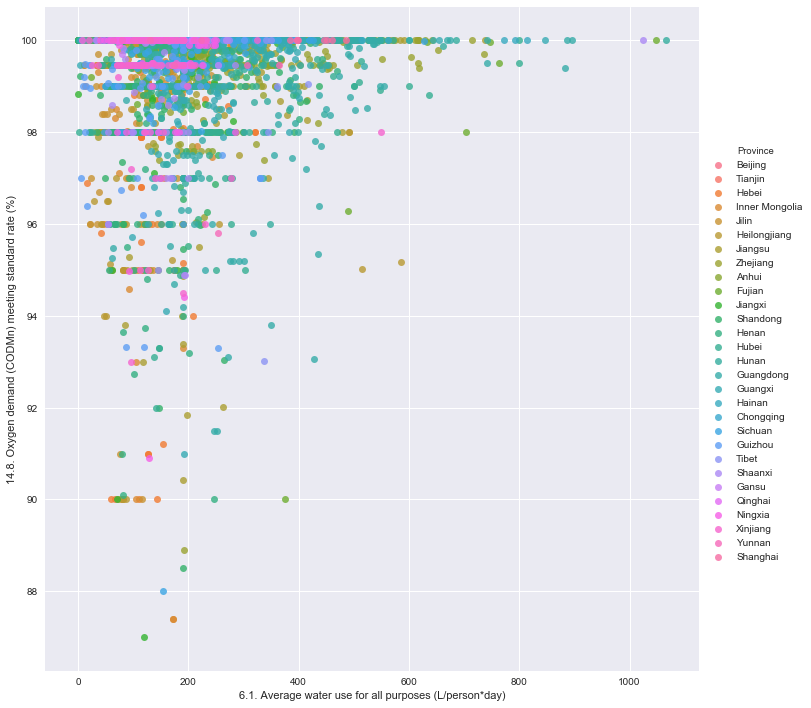

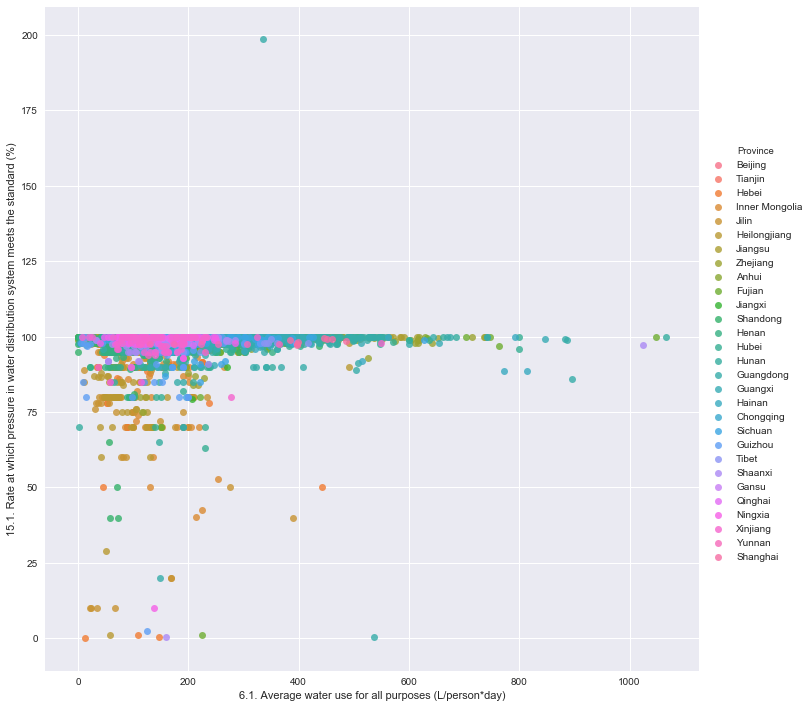

In [10]:
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']

for y in Y:
    x = '6.1. Average water use for all purposes (L/person*day)'
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=10, fit_reg=False)
    plt.show()

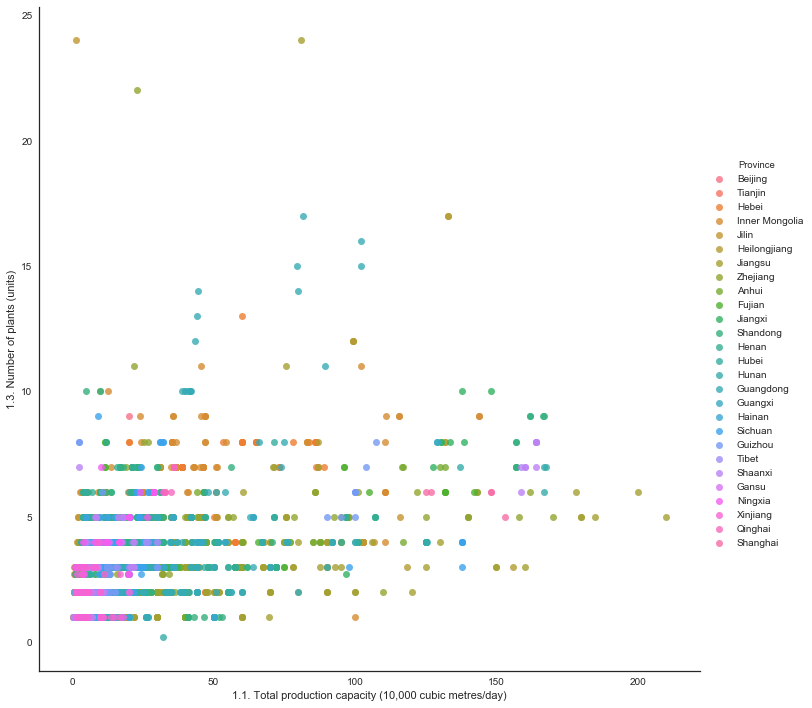

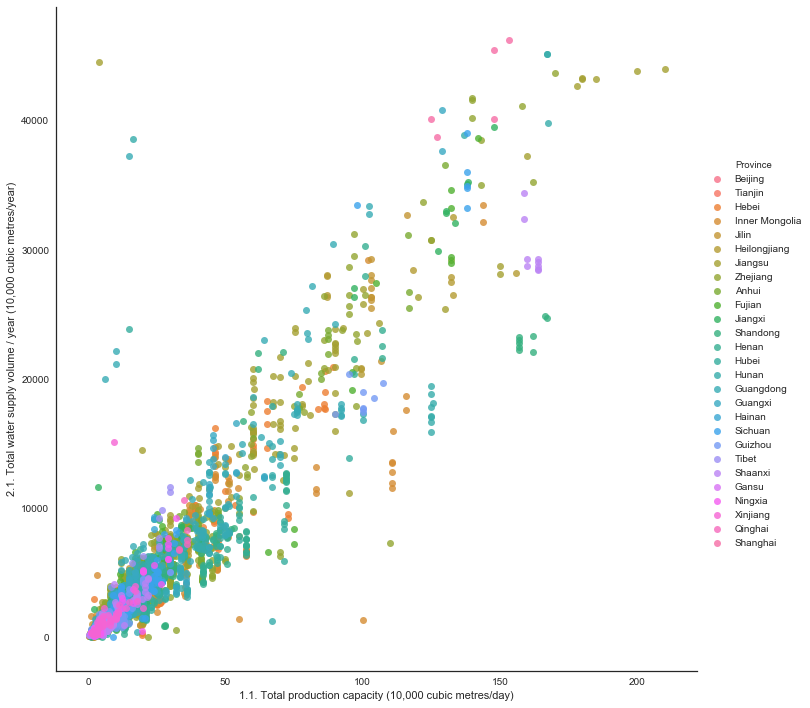

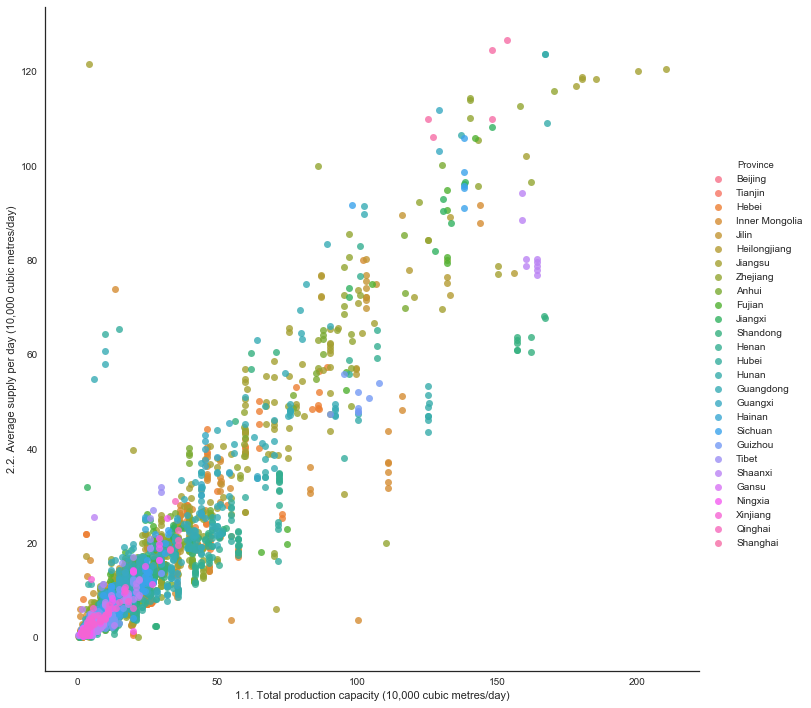

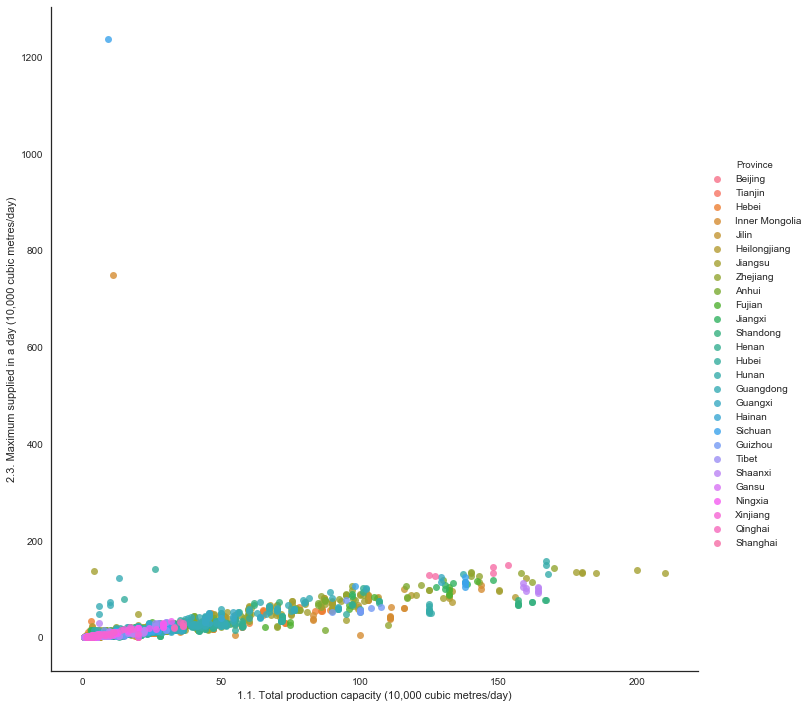

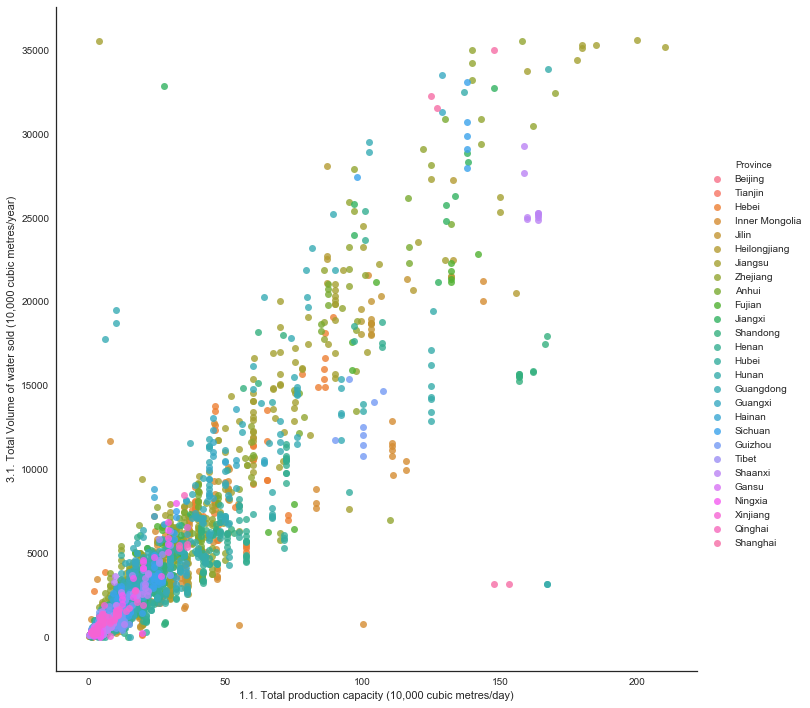

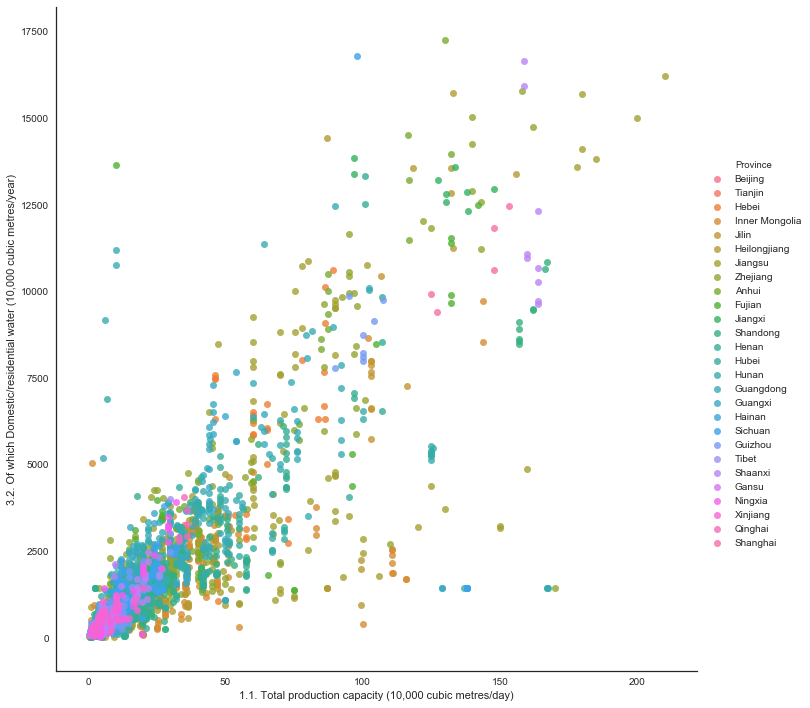

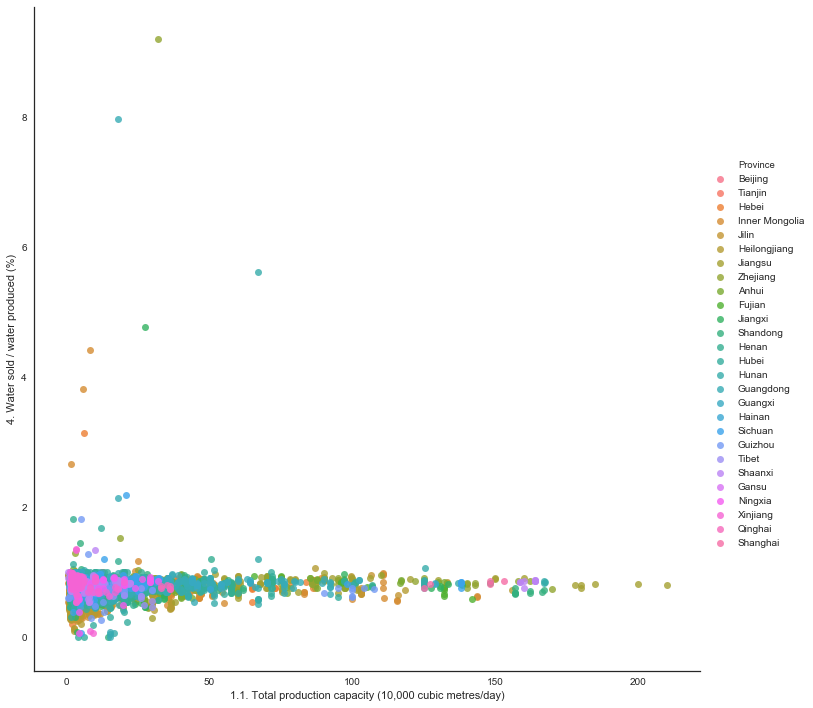

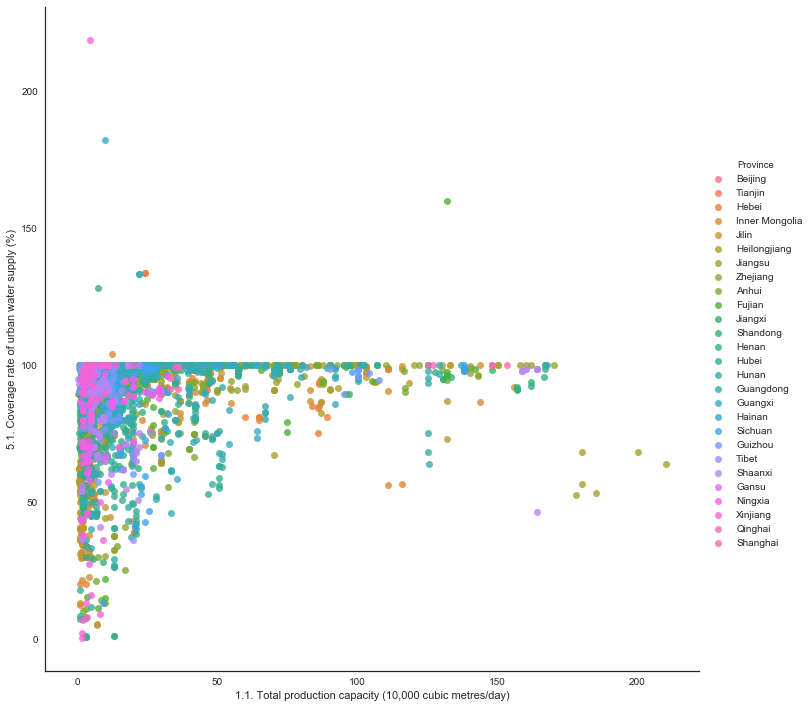

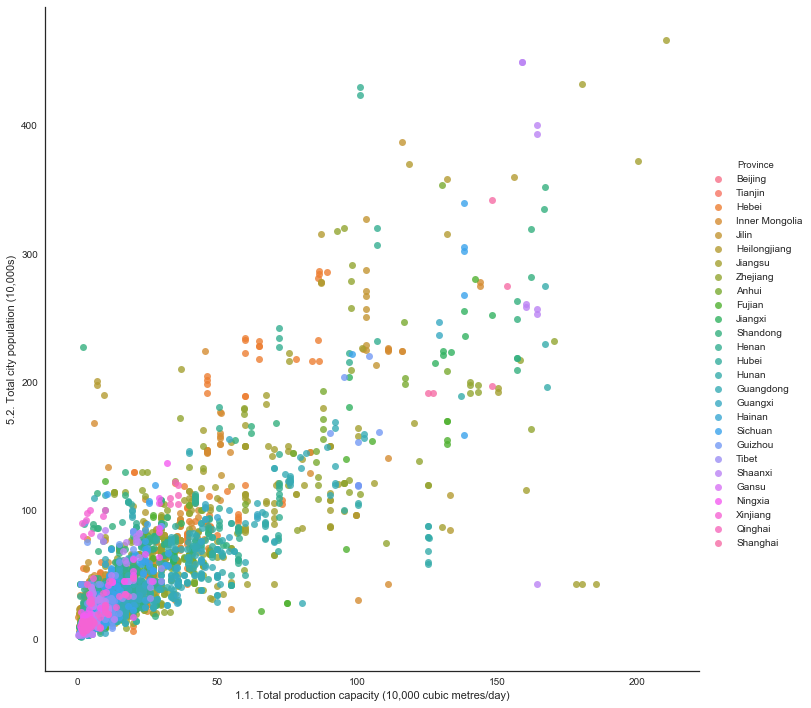

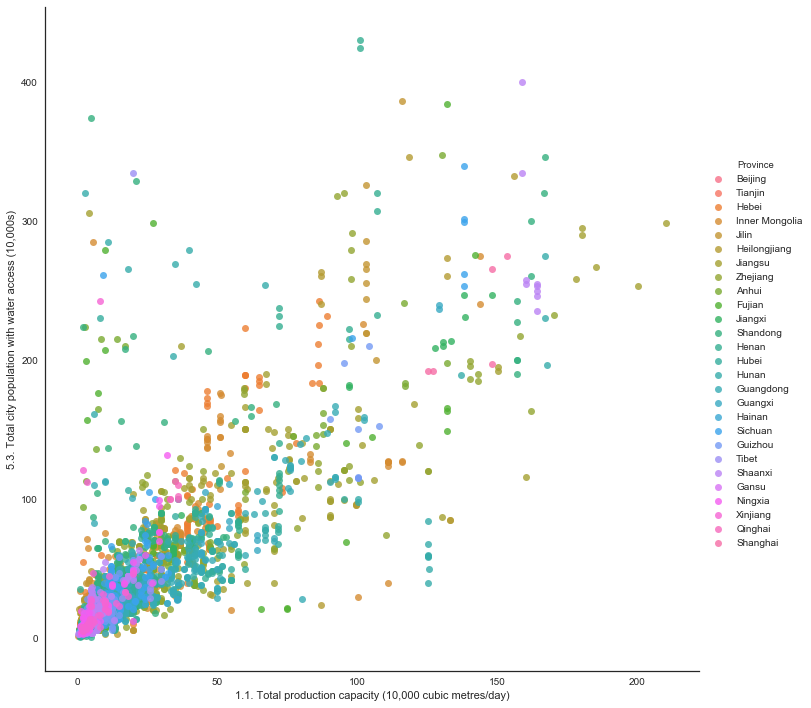

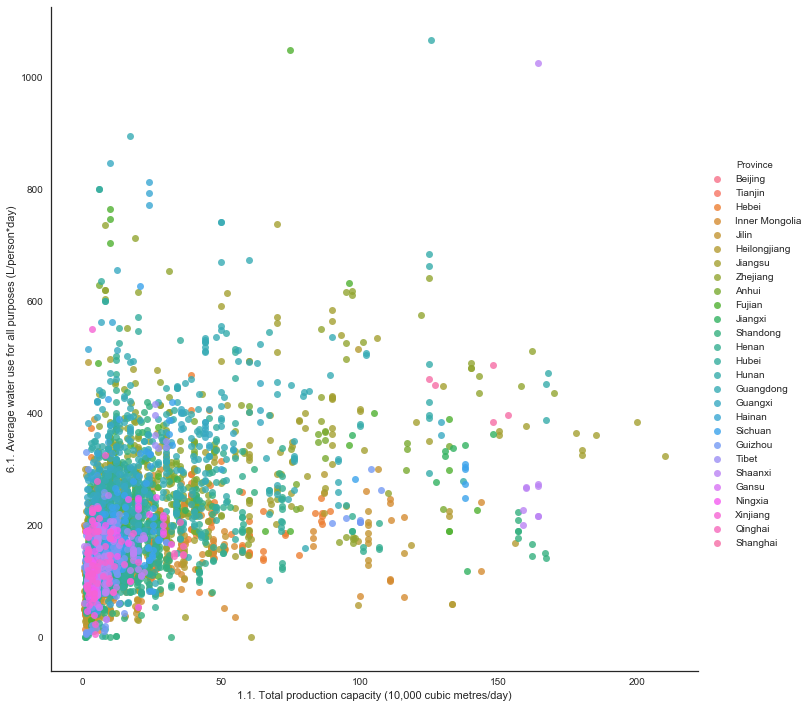

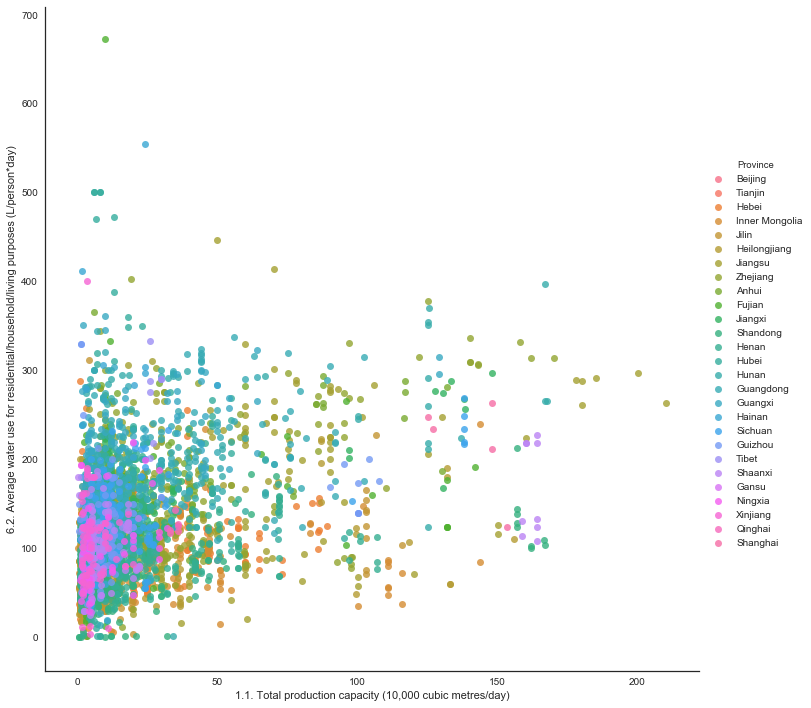

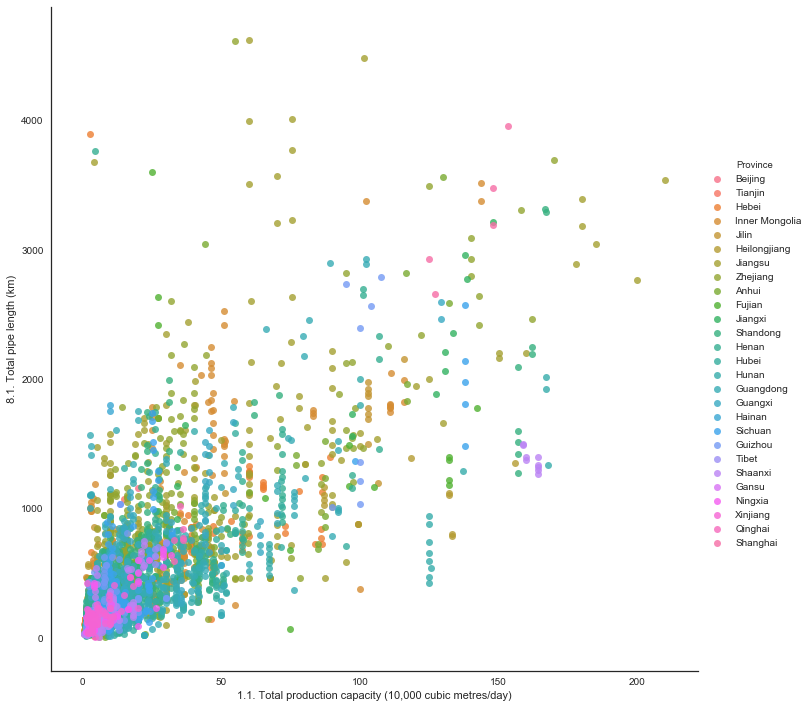

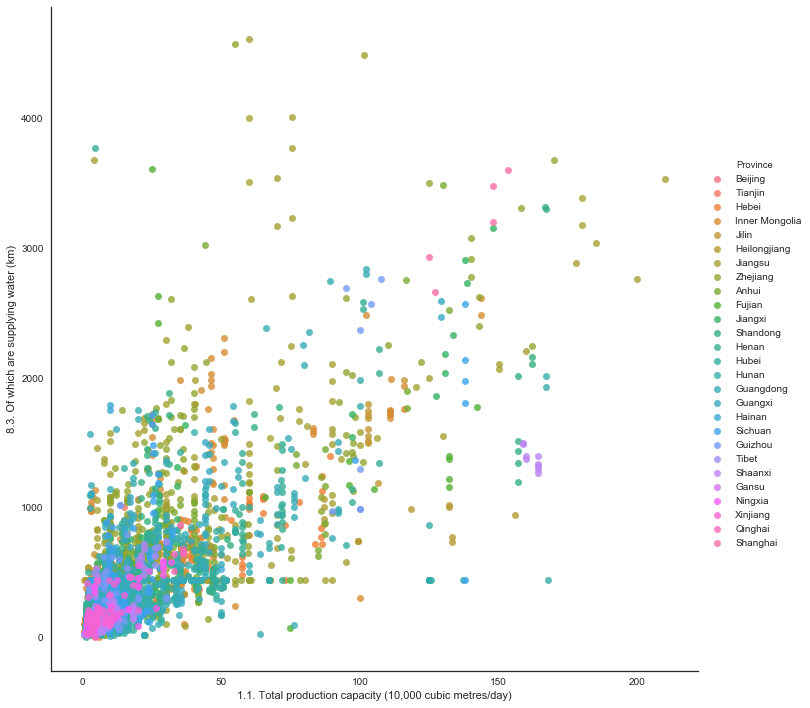

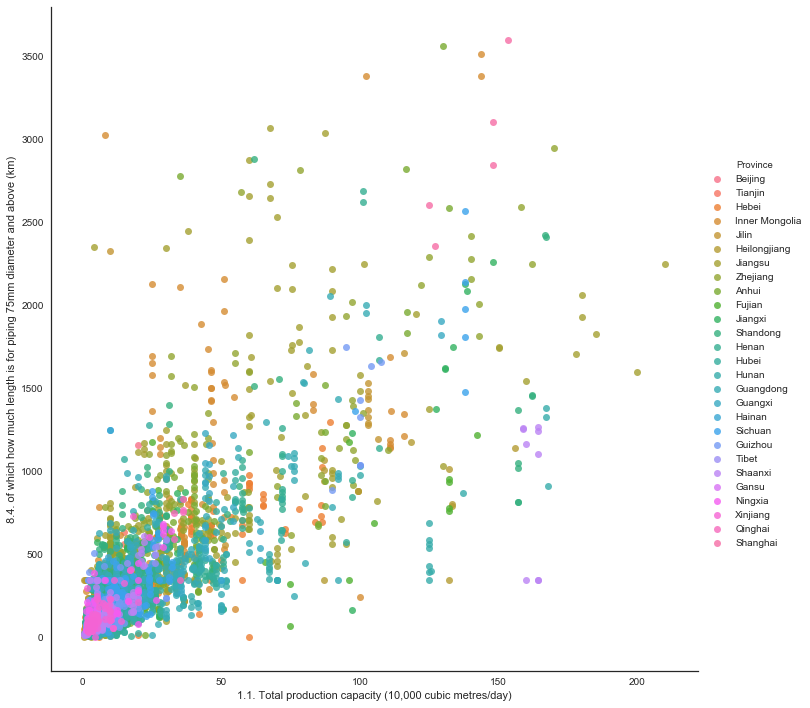

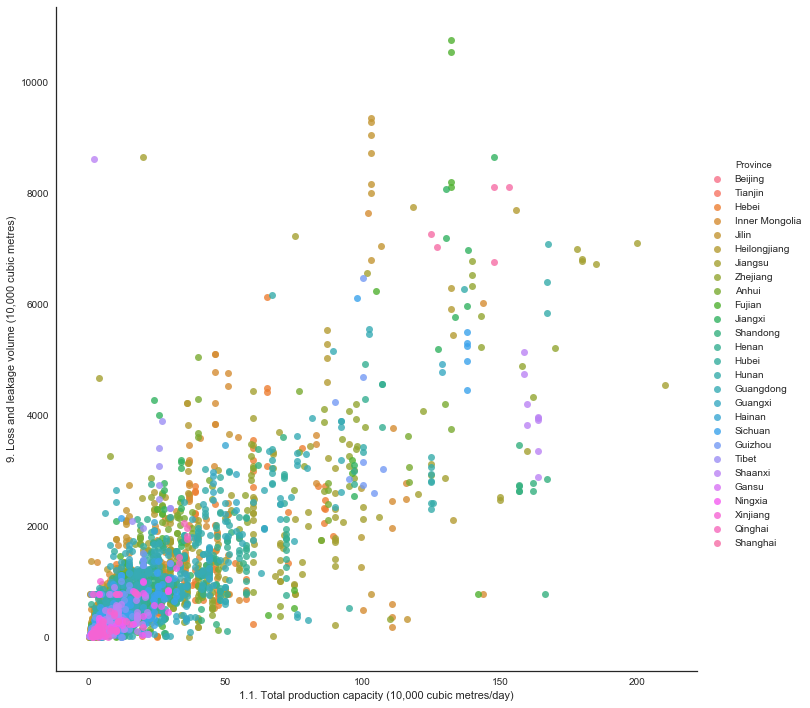

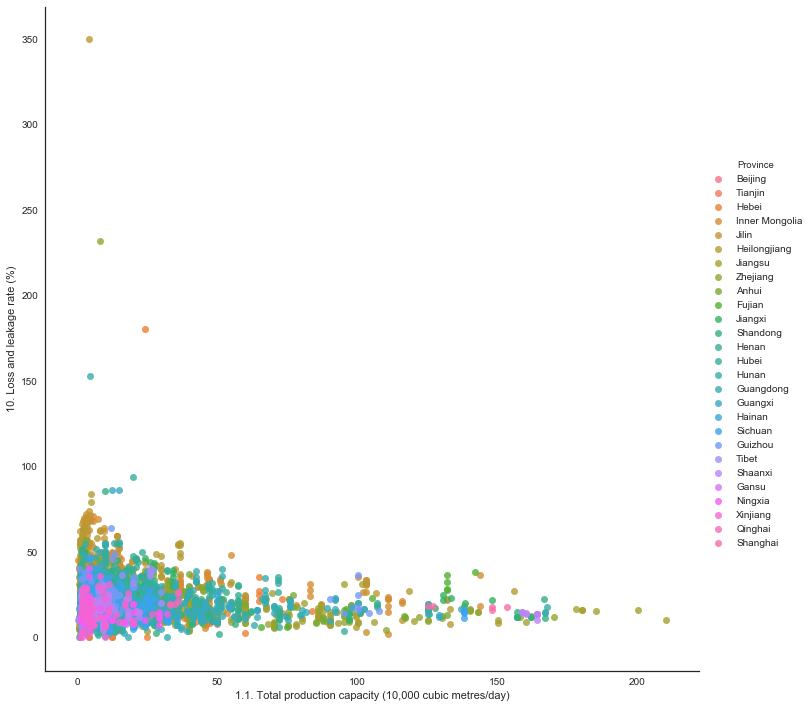

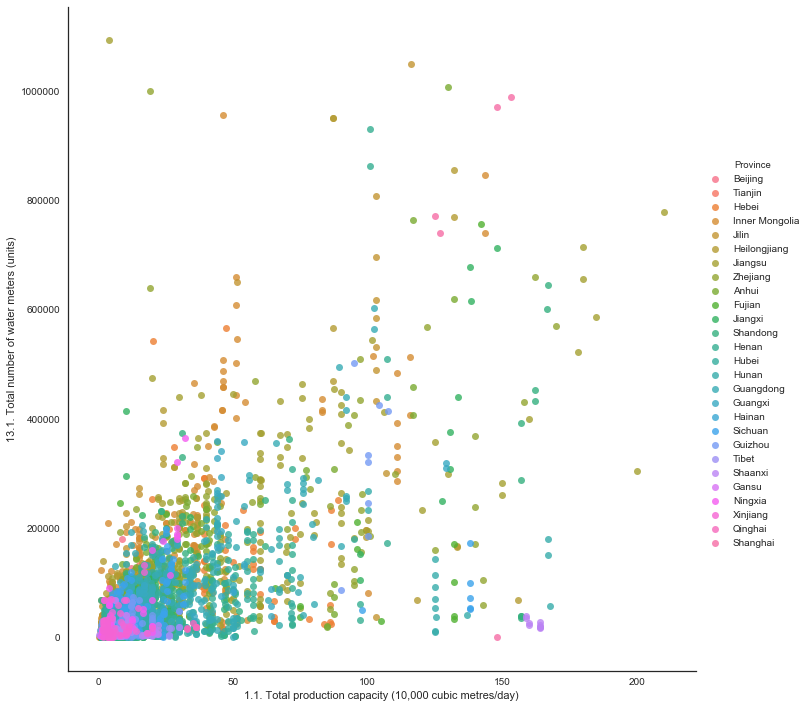

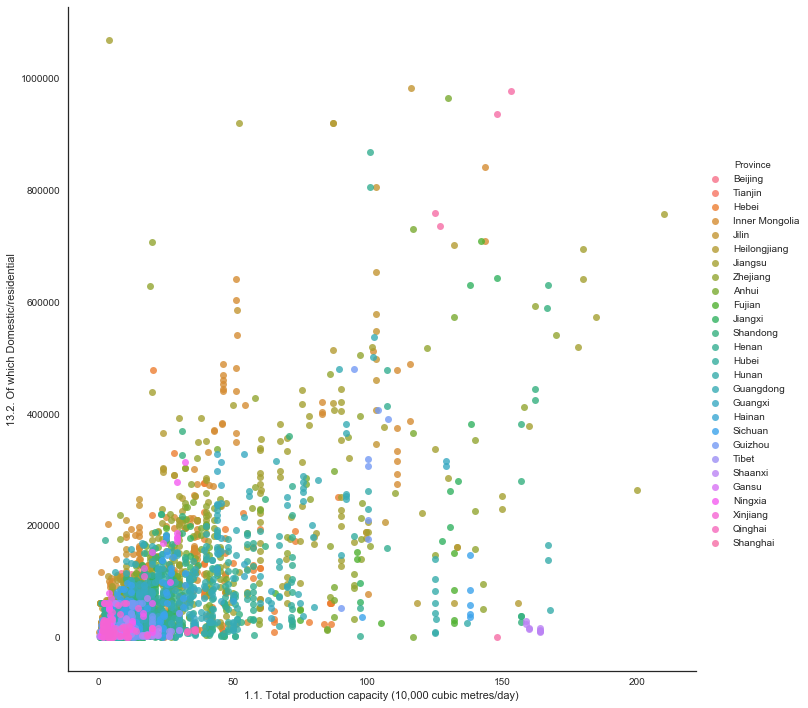

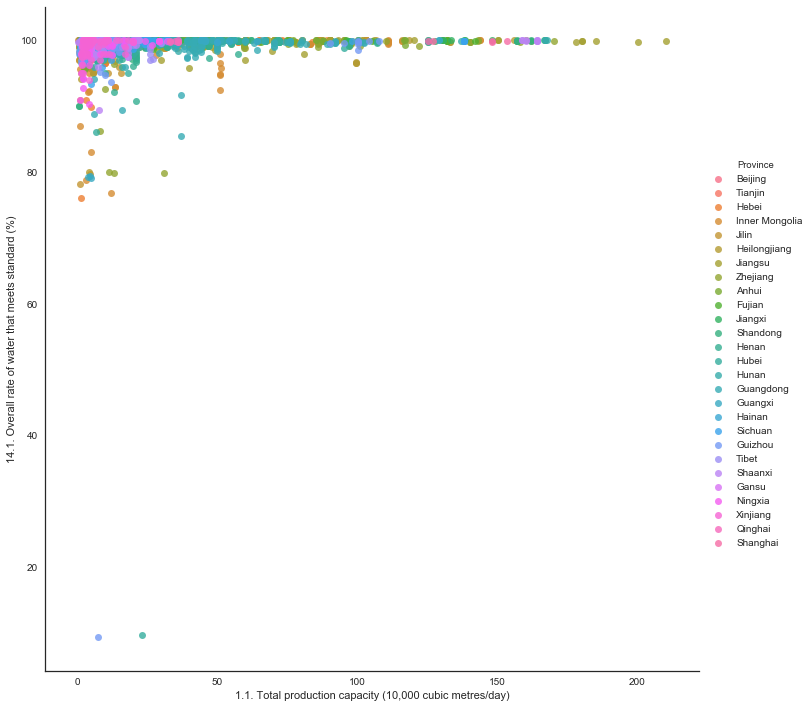

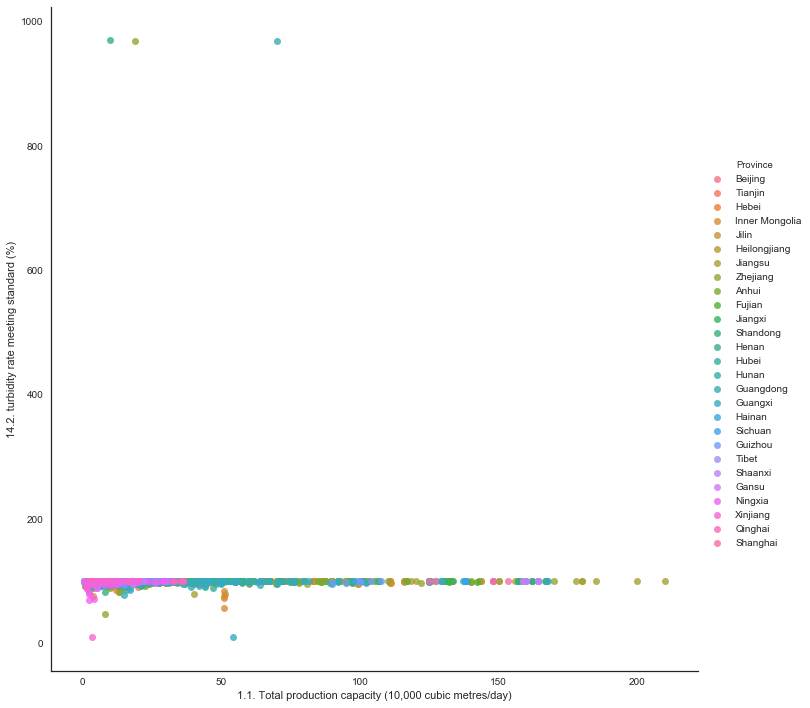

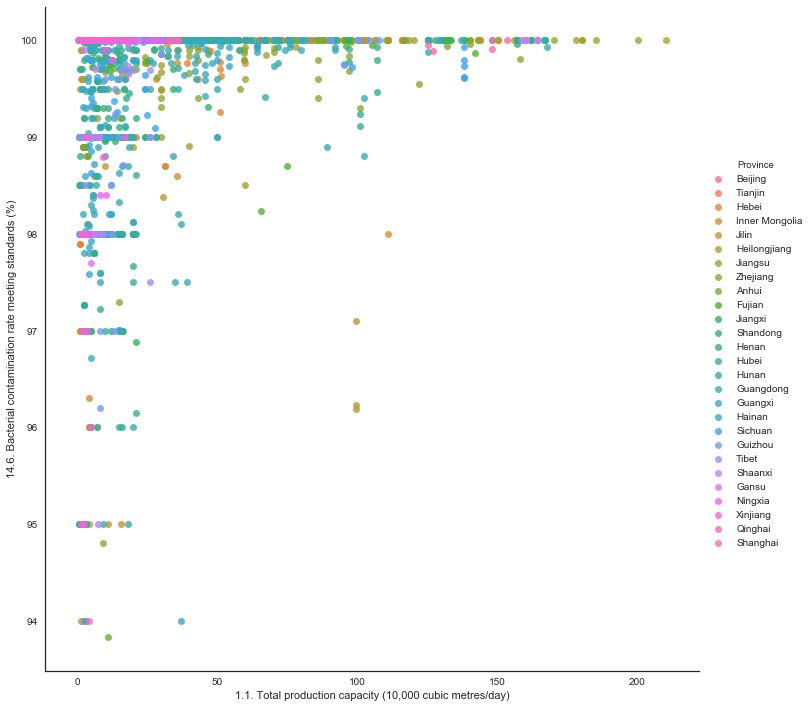

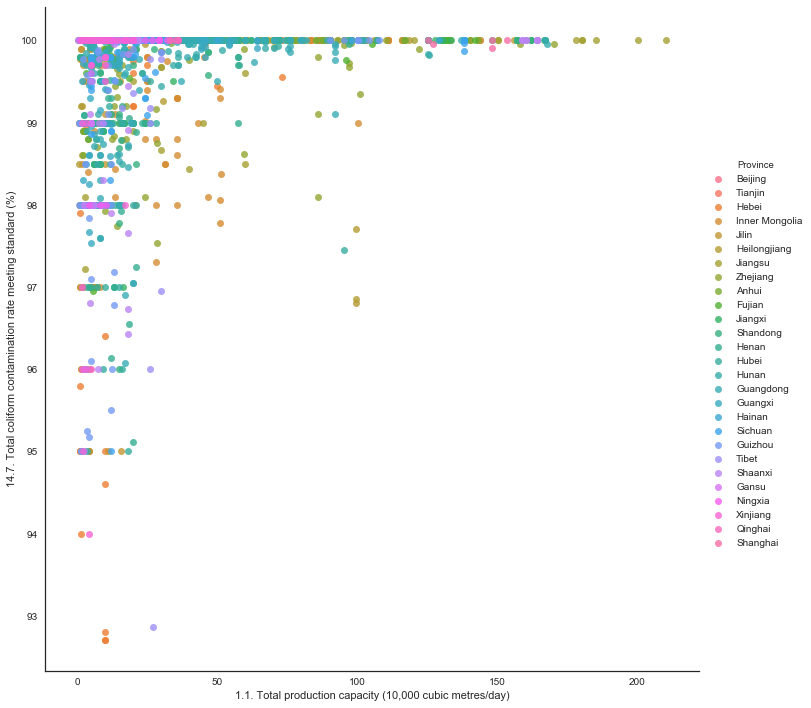

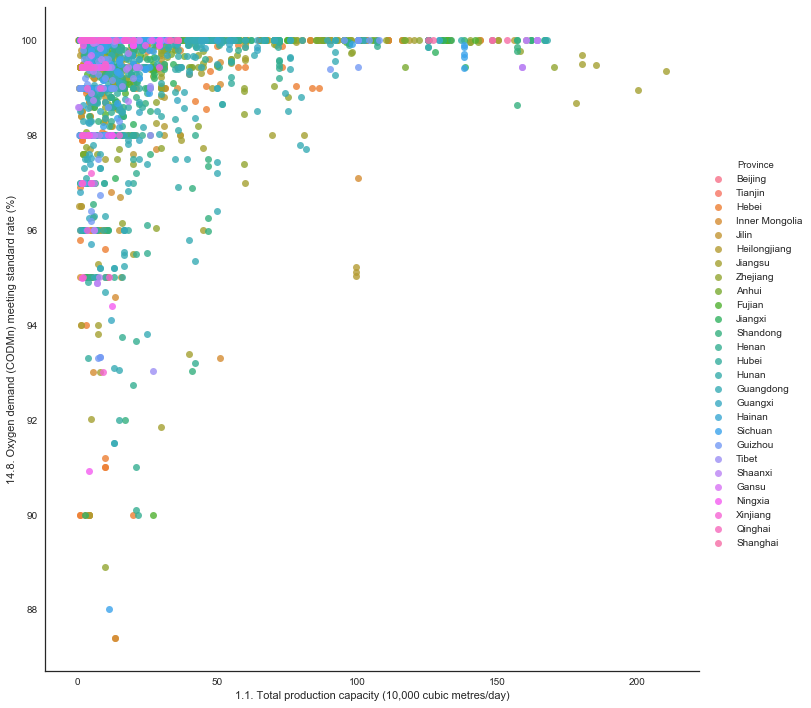

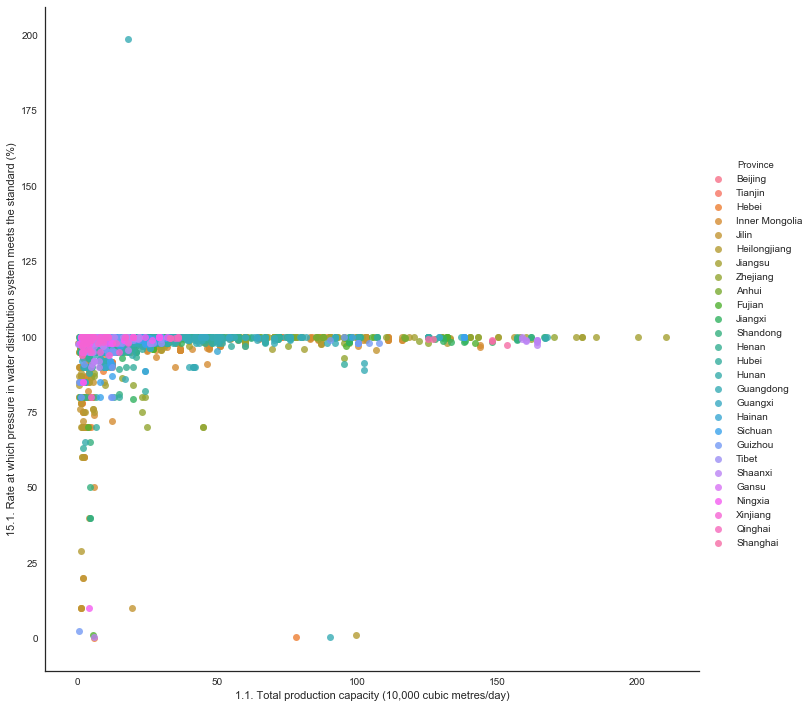

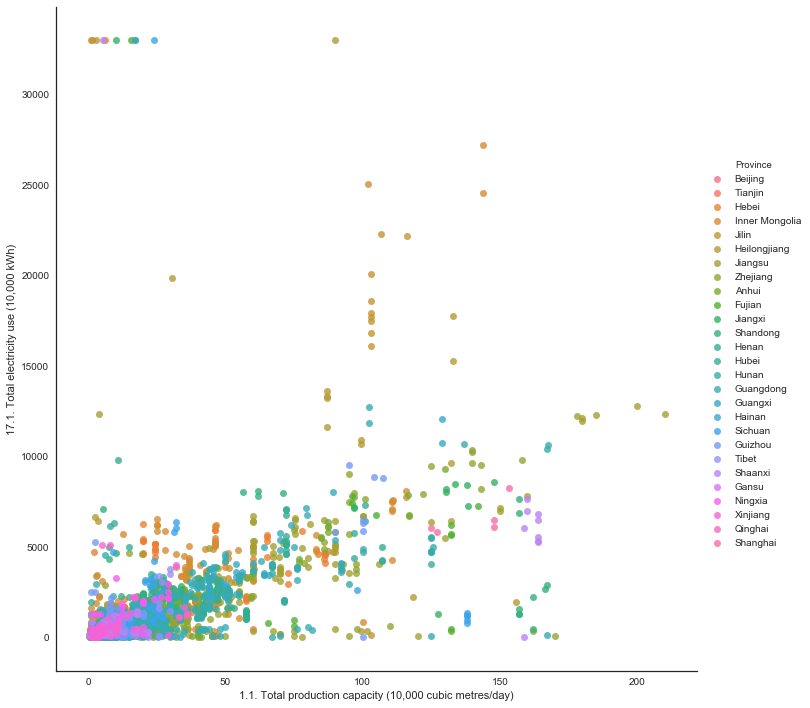

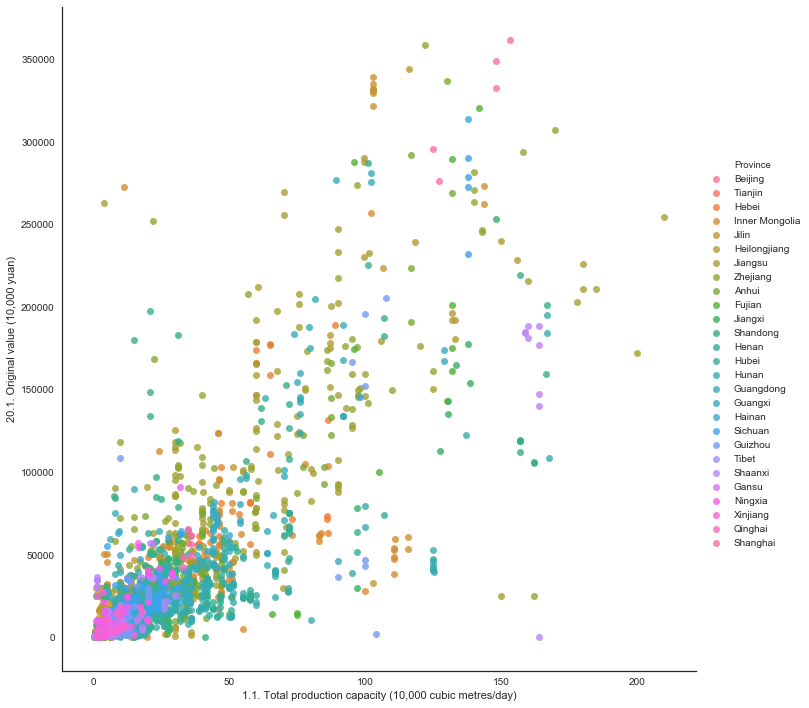

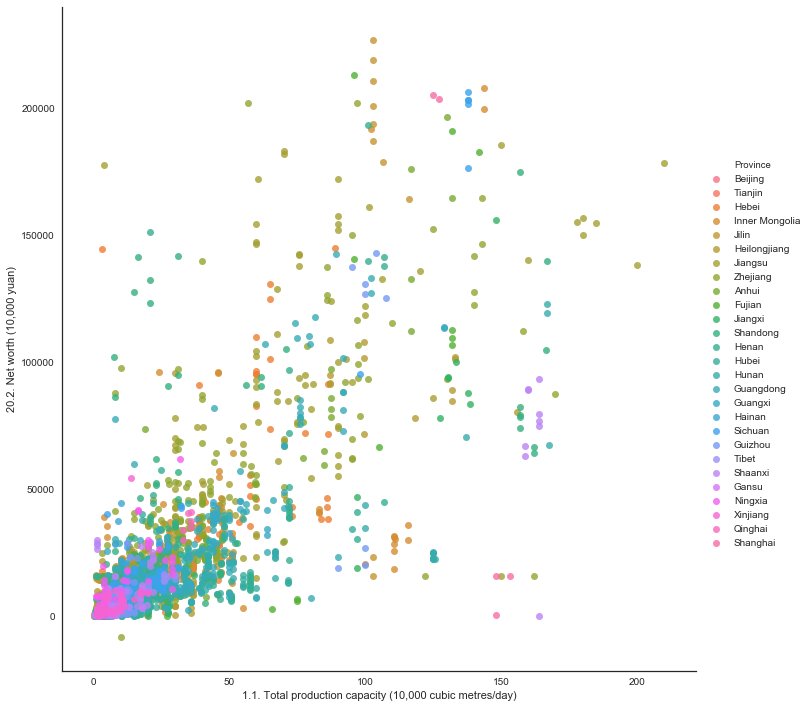

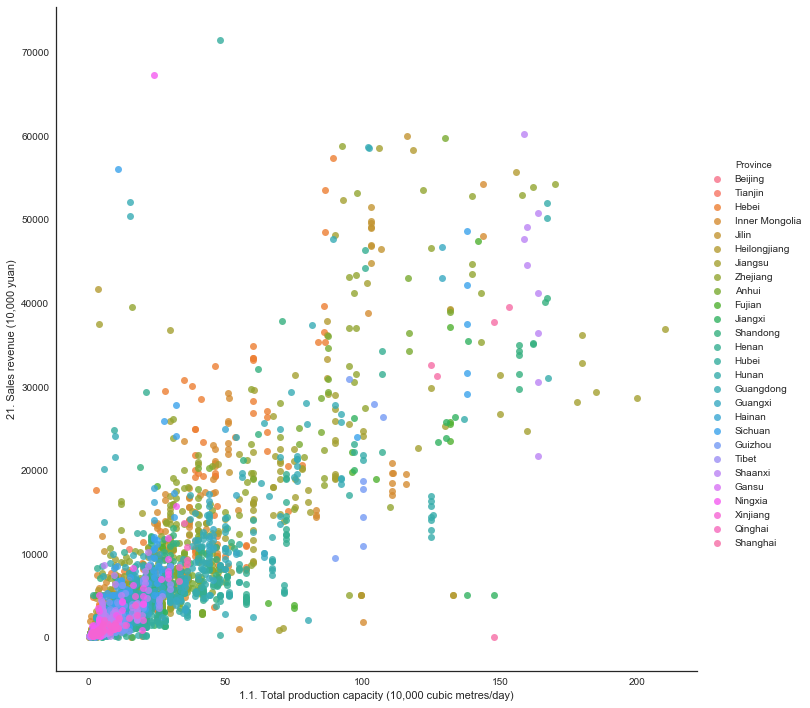

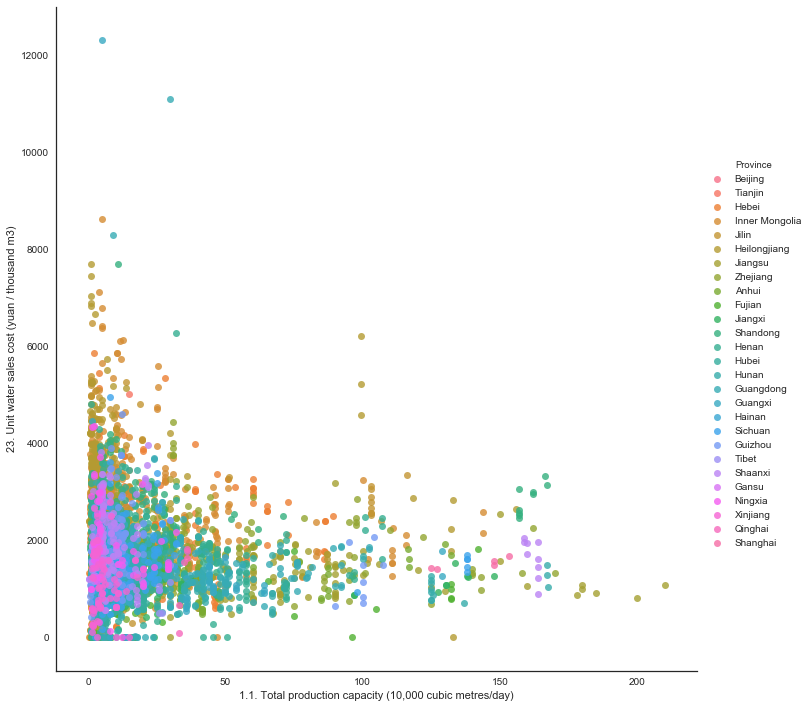

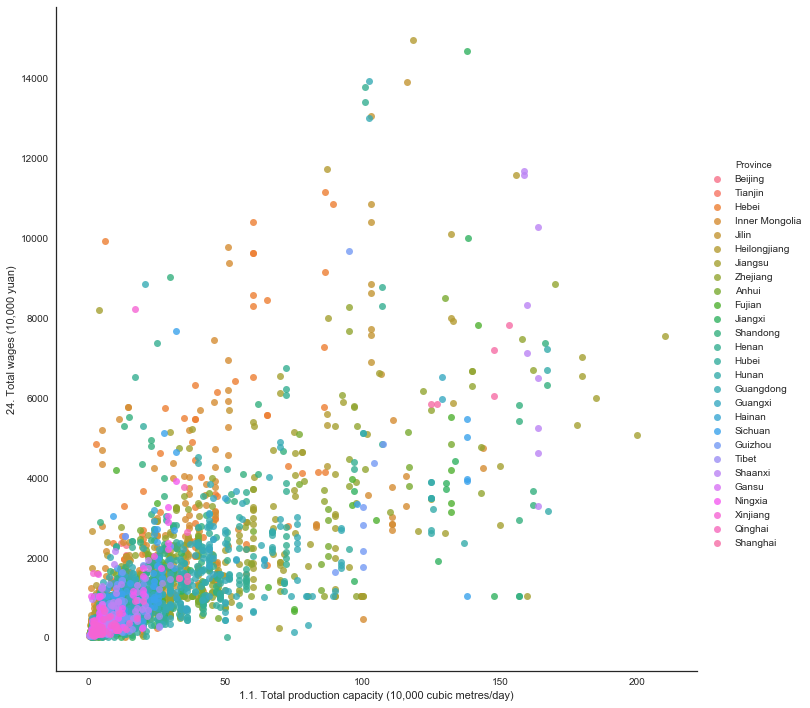

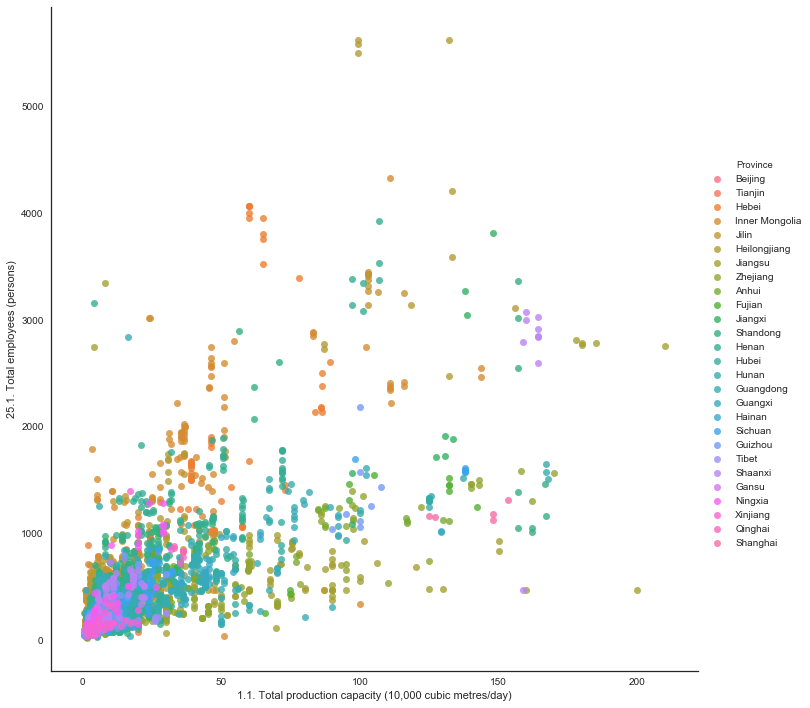

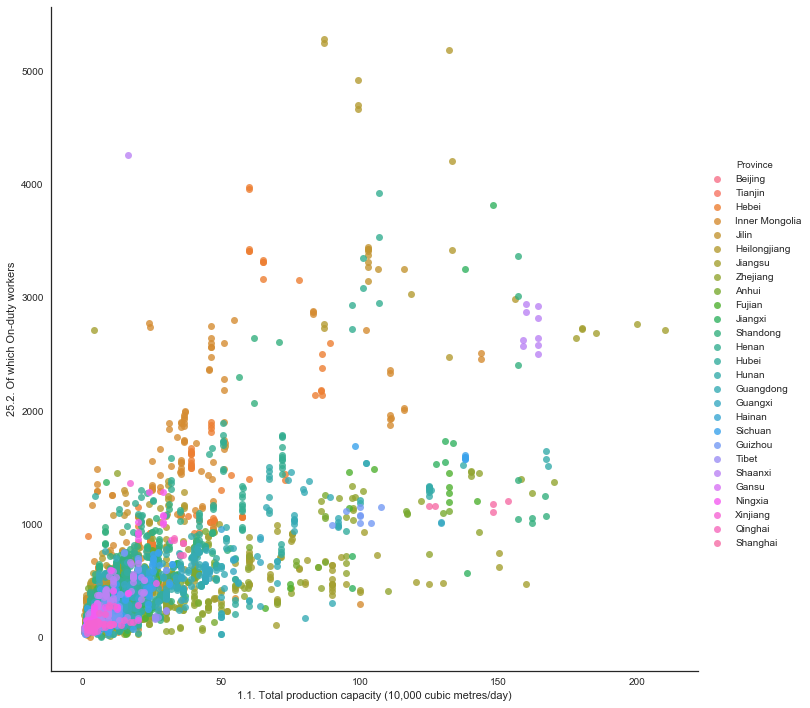

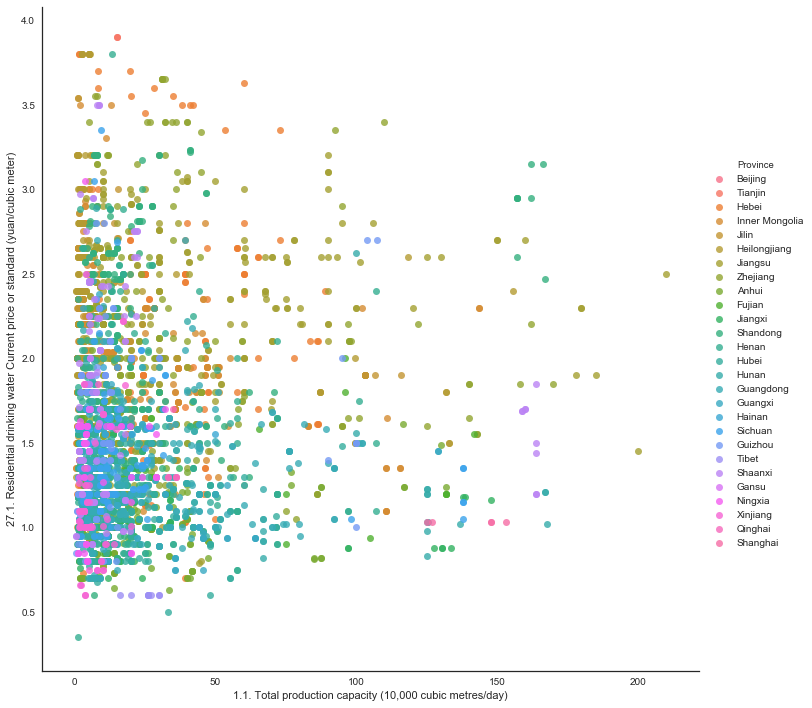

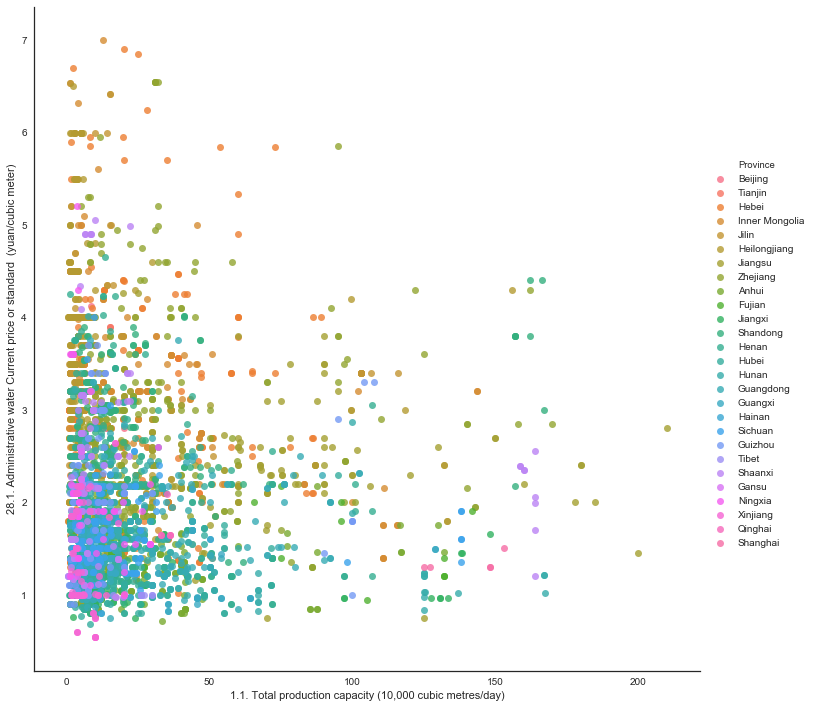

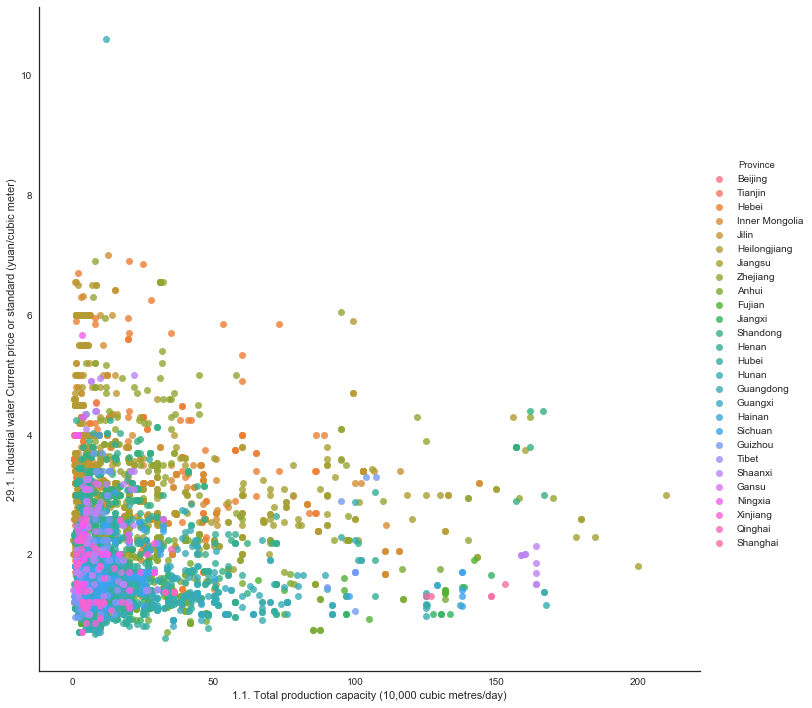

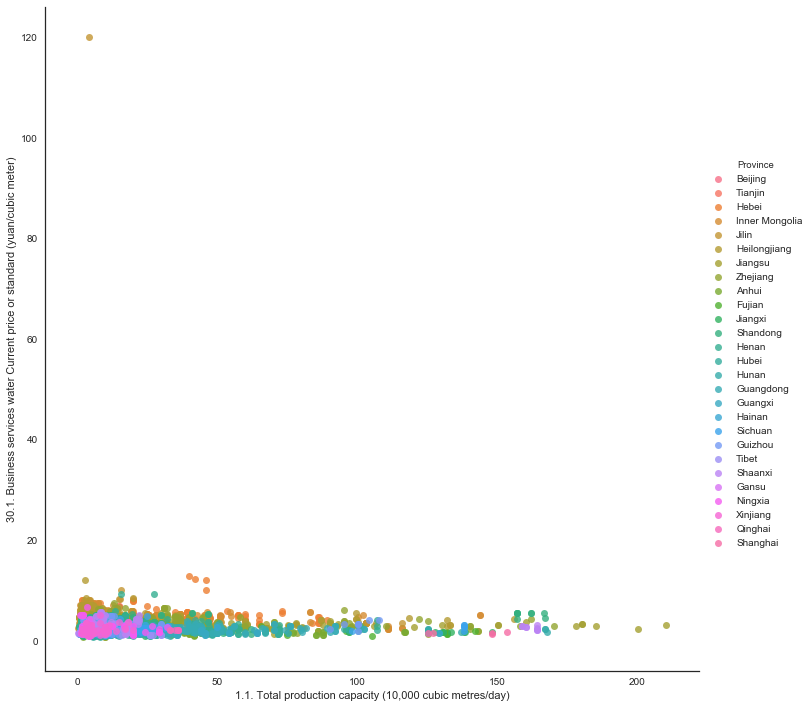

In [40]:
Y = ['1.3. Number of plants (units)',
       '2.1. Total water supply volume / year (10,000 cubic metres/year)',
       '2.2. Average supply per day (10,000 cubic metres/day)',
       '2.3. Maximum supplied in a day (10,000 cubic metres/day)',
       '3.1. Total Volume of water sold (10,000 cubic metres/year)',
       '3.2. Of which Domestic/residential water (10,000 cubic metres/year)',
       '4. Water sold / water produced (%)',
       '5.1. Coverage rate of urban water supply (%)',
       '5.2. Total city population (10,000s)',
       '5.3. Total city population with water access (10,000s)',
       '6.1. Average water use for all purposes (L/person*day)',
       '6.2. Average water use for residential/household/living purposes (L/person*day)',
       '8.1. Total pipe length (km)', '8.3. Of which are supplying water (km)',
       '8.4. of which how much length is for piping 75mm diameter and above (km)',
       '9. Loss and leakage volume (10,000 cubic metres)',
       '10. Loss and leakage rate (%)',
       '13.1. Total number of water meters (units)',
       '13.2. Of which Domestic/residential',
       '14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)',
       '17.1. Total electricity use (10,000 kWh)',
       '20.1. Original value (10,000 yuan)', '20.2. Net worth (10,000 yuan)',
       '21. Sales revenue (10,000 yuan)',
       '23. Unit water sales cost (yuan / thousand m3)',
       '24. Total wages (10,000 yuan)', '25.1. Total employees (persons)',
       '25.2. Of which On-duty workers',
       '27.1. Residential drinking water Current price or standard (yuan/cubic meter)',
       '28.1. Administrative water Current price or standard  (yuan/cubic meter)',
       '29.1. Industrial water Current price or standard (yuan/cubic meter)',
       '30.1. Business services water Current price or standard (yuan/cubic meter)']
x='1.1. Total production capacity (10,000 cubic metres/day)'
for y in Y:
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=10, fit_reg=False)
    plt.show()

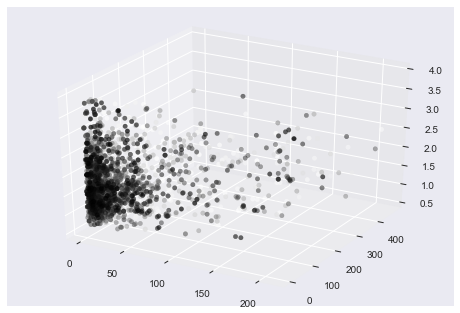

In [44]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D 

x=df_og['1.1. Total production capacity (10,000 cubic metres/day)']
y=df_og['5.2. Total city population (10,000s)']
z=df_og['27.1. Residential drinking water Current price or standard (yuan/cubic meter)']

xyz = np.vstack([x,y,z])
density = stats.gaussian_kde(xyz)(xyz) 

idx = density.argsort()
x, y, z, density = x[idx], y[idx], z[idx], density[idx]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=density)
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(max_depth=50, n_estimators=20, max_features='log2', random_state=0)

Y=df_og['Province']
X=df_og.drop(['City/province name (CN)', 'City/province name (EN)', 'Province','Year'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

rf.fit(X_train,Y_train)
print('train score: ',rf.score(X_train,Y_train))
print('test score: ', rf.score(X_test,Y_test))

train score:  1.0
test score:  0.800965018094


In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [5,10,15,20], 'max_depth':[10,20,50,75,100], 'max_features':['auto', 'sqrt', 'log2']}
gs = GridSearchCV(rf, parameters)
gs.fit(X,Y)
print(gs.best_params_)

/Users/andrewmgonzalez/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 50, 'max_features': 'log2', 'n_estimators': 20}
